In [1]:
import configparser
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

inifile = configparser.ConfigParser()
inifile.read('../config.ini')
df = pd.read_csv(
    inifile.get('url', 'breast_cancer_wisconsin'), header=None)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
pipe_lr = Pipeline(
    [('scl', StandardScaler()), ('clf', LogisticRegression(random_state=0))])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# 学習曲線 (learning curve): サンプル数に対する精度の関数
# train_sizesで学習曲線のプロット位置を設定
# cvで分割交差検証のkを設定
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

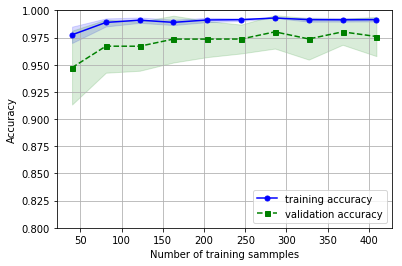

In [3]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training sammples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
# バイアスが高い: 学習不足。モデルが単純すぎる、特徴量が少なすぎる、正則化が強すぎるなど。
# バリアンスが高い: 過学習。モデルが複雑すぎる、特徴量が多すぎるなど。
# バリアンスが僅かに高い様子を可視化する
plt.show()

In [4]:
from sklearn.model_selection import validation_curve
# 検証曲線 (validation curve): パラメータに対する精度の関数
# clf__C: classifier of C
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C', param_range=param_range
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

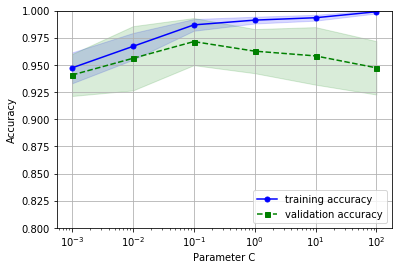

In [5]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
# Cの値を小さくして正則化を強めると学習不足(バイアスが高く)なる
# C=0.1 あたりが最適
plt.show()